# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [4]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task


# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

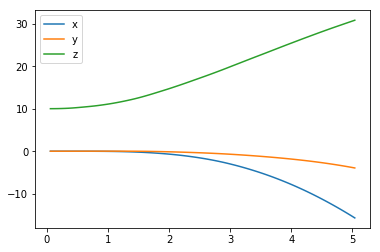

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

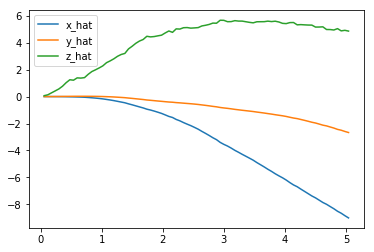

In [6]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

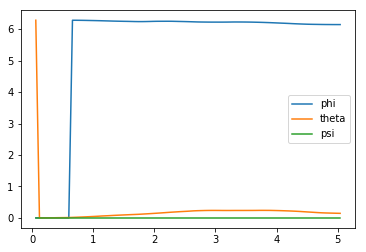

In [7]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

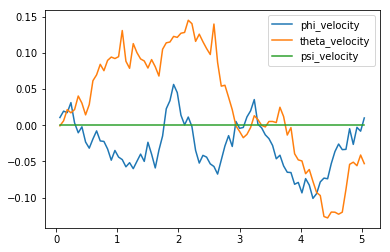

In [8]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

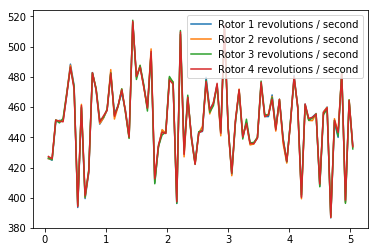

In [9]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [10]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-15.69080975  -3.94103912  30.80515504   6.14526069   0.14555963
   0.        ]
[-9.00710471 -2.66769516  4.86092489]
[ 0.01004774 -0.05300722  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [12]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state)[0]
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =   16, score = -303.009 (best = -171.110), noise_scale = 3.255

H:\Udamy\session5\RL-Quadcopter-2\physics_sim.py:131: RuntimeWarning: overflow encountered in multiply
  angles = self.pose[3:] + self.angular_v * self.dt + 0.5 * self.angular_accels * self.angular_accels * self.dt ** 2
H:\Udamy\session5\RL-Quadcopter-2\physics_sim.py:132: RuntimeWarning: invalid value encountered in remainder
  angles = (angles + 2 * np.pi) % (2 * np.pi)


Episode = 1000, score = -228.240 (best = -38.558), noise_scale = 3.22

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [1]:
import numpy as np
import tensorflow as tf
from agents.agent import DDPG
from task import Task


num_episodes = 200
gamma = 0.99
buffer_size = 50000
batch_size = 64
tau = 0.001
critic_learning_rate = 0.001
actor_learning_rate = 0.002
init_pose=[0,0,0.1,0,0,0]
init_velocities=None
init_angle_velocities=None
runtime=5
target_pos=[0,0,20]


task = Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pos)
agent = DDPG(task, gamma, critic_learning_rate, actor_learning_rate, buffer_size, batch_size, tau, num_episodes)


In [2]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    rewards = []
    average_rewards = []
    
    
    labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
    results = {x : [] for x in labels}
    
    for i_episode in range(num_episodes+1):
        agent.last_state = agent.reset_episode()
        #print(state.shape)
        episode_reward = 0
        
        
        while True:
            
            state = np.reshape(agent.last_state, [-1, agent.action_repeat* agent.state_size])
        
            action = sess.run(agent.a, feed_dict={agent.s:state})
        
            action = action[0] + agent.noise.sample()
        
            next_state, reward, done = task.step(action)
            
            if i_episode > num_episodes - 1:
                to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
                for ii in range(len(labels)):
                    results[labels[ii]].append(to_write[ii])
              
            
            reward = max(-100., reward)
            episode_reward += reward
                      
                            
            agent.step(action, reward, next_state, done)
            
            
            if task.done or done:
                print('reward = {:.2f}, v = {:.2f}, z = {:.2f} '.format(episode_reward, task.sim.v[2], task.sim.pose[2]), end="")
                
                break
         
                
        rewards.append(episode_reward)
        if len(rewards)>=10:
            last_10_average_rewards = np.mean(rewards[-10:])
            average_rewards.append(last_10_average_rewards)
            print('average_reward = {:.2f}'.format(last_10_average_rewards))
        print('episode = {}'.format(i_episode))
        
        
        
            
            
    

reward = 2107.32, v = 4.64, z = 17.95 episode = 0
reward = 2173.76, v = 5.93, z = 19.74 episode = 1
reward = 2061.63, v = 1.66, z = 15.32 episode = 2
reward = 2054.12, v = 4.52, z = 17.99 episode = 3
reward = 2086.50, v = 5.82, z = 18.66 episode = 4
reward = 2179.82, v = 3.36, z = 17.51 episode = 5
reward = 2096.53, v = 3.27, z = 16.28 episode = 6
reward = 2088.97, v = 4.95, z = 18.20 episode = 7
reward = 2097.41, v = 3.10, z = 17.07 episode = 8
reward = 2122.51, v = 4.82, z = 18.05 average_reward = 2106.86
episode = 9
reward = 2040.06, v = 3.59, z = 16.82 average_reward = 2100.13
episode = 10
reward = 2116.27, v = 5.16, z = 18.71 average_reward = 2094.38
episode = 11
reward = 2095.03, v = 5.40, z = 18.56 average_reward = 2097.72
episode = 12
reward = 2133.27, v = 4.20, z = 17.42 average_reward = 2105.64
episode = 13
reward = 2077.70, v = 1.28, z = 14.42 average_reward = 2104.76
episode = 14
reward = 2124.57, v = 5.08, z = 18.74 average_reward = 2099.23
episode = 15
reward = 2123.43, v

reward = 2114.99, v = 5.53, z = 18.74 average_reward = 2104.55
episode = 111
reward = 2050.61, v = 3.49, z = 16.59 average_reward = 2098.68
episode = 112
reward = 2070.29, v = 5.72, z = 18.88 average_reward = 2097.28
episode = 113
reward = 2124.77, v = 5.83, z = 19.06 average_reward = 2096.50
episode = 114
reward = 2092.66, v = 4.72, z = 17.80 average_reward = 2096.67
episode = 115
reward = 2029.05, v = 5.54, z = 17.83 average_reward = 2086.19
episode = 116
reward = 2191.08, v = 6.03, z = 19.74 average_reward = 2094.80
episode = 117
reward = 2125.38, v = 6.00, z = 19.02 average_reward = 2093.34
episode = 118
reward = 2071.39, v = 5.97, z = 19.00 average_reward = 2097.20
episode = 119
reward = 2100.85, v = 5.51, z = 18.70 average_reward = 2097.11
episode = 120
reward = 2090.98, v = 4.84, z = 17.82 average_reward = 2094.71
episode = 121
reward = 2174.77, v = 5.04, z = 18.54 average_reward = 2107.12
episode = 122
reward = 2113.25, v = 5.44, z = 18.78 average_reward = 2111.42
episode = 123

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

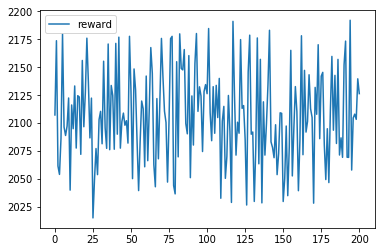

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(rewards, label='reward')
plt.legend()

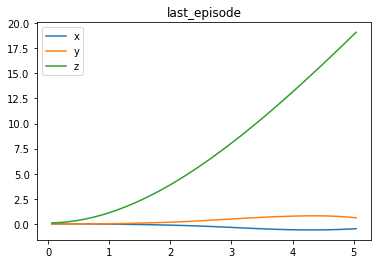

In [4]:
plt.title('last_episode')
plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()




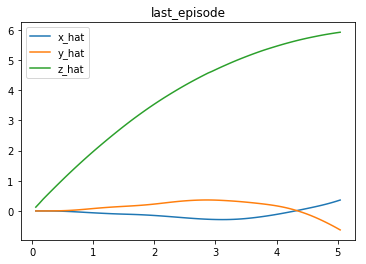

In [5]:
plt.title('last_episode')
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

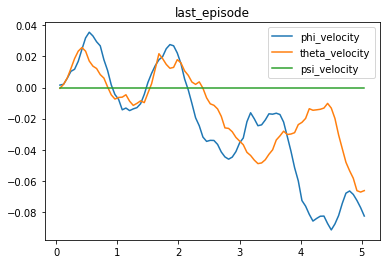

In [6]:
plt.title('last_episode')
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()


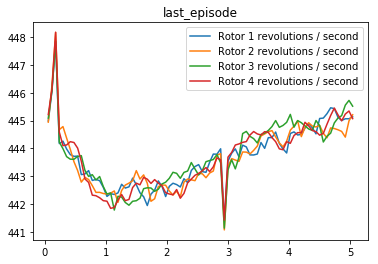

In [7]:
plt.title('last_episode')
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

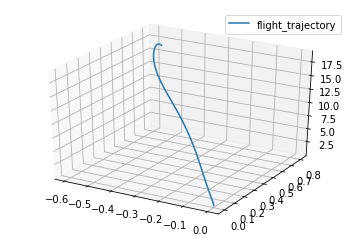

In [8]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(results['x'],results['y'],results['z'], label='flight_trajectory')
ax.legend()
plt.show()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: I used full ['x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity'] as observation states, which are 12 Dimensions.
         The task is letting the Quadcopter fly straight up.
         Reward function is 1.balance_reward penalizes('theta, psi') angles
                      2.time_rewards, penalizes every time step. leting the copter lift as quick as possible.
                      3.position_rewards, penalizes diverting form (x, y) axis, and get positive rewards proportional to Z axis ascent by magnitude. 
                      4.heavy penalizes if the chopper drop to the ground.
       
       
       Modified: I am using

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**: 1. I am using DDGP algorithm coded in tensorflow.
       2. reward discount factor gamma = 0.9;
         replay buffer_size = 5000;
         batch_size = 64;
         parameter soft replacement tau = 0.01;
         critic_learning_rate = 0.001;
         actor_learning_rate = 0.0005;
       3. I vertical stack the action repeat to creat a 3 * 12 matrix.
         For actor, I use a 2 layer convolution network to catch the spacial features through time.
         For critic, I use a linear function wx+b to creat the Φ(s,a), then also use a 2 layer convolution netword to approximate Q_value. Using batch_normalization befor activation function. For actor function, activation is relu between conv layers, and tanh for the output layer. For critic function, activation is also relu between conv layers, linear activation for the output layer for Q.
         
        Modified: Due to input state space is a small [3,12], 36 Dimension in total, using Convolution net as function approximation is a bit unstable. And easily have gradient explosion problem. I changed to 2 dense layer as function approximation with 400 and 300 nodes.
       
        

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
    Straight lifting up is quite a easy task. Due to the reward conditions, seems the chopper learns that the task will end if the exceed the upper boundary 300m, I am setting if the chopper above the target Z altitude, it will gain positive reward at each time step, and still gain positive even if the restrained on x,y axis(due to unpoportional magnitude setup). That can explain the chopper's behaver, full throttle to reach the target height with very litter divergence,and reduce the speed and powerup again, after a certain height the chopper goes to sideways and reatining the altitude until episode time ended. 
   As observing the flying trajectory, the chopper's performance seems ok.
   
   Modified: the chopper can learn to take off in just one episode training and converge with appropriate reward function.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:Getting started is the most difficult. It took me a whole week to read and learn the reinformant learning concept. The video lecture explain very detailed on the tablet method, from function approximation onwards are too abstract, it took me quite a long time to watch other videos and read a lot of materials to understand.
And then acturally building the model to work in tensorflow took me another whole week. The most difficult part for this is the varible initialization, get variables in reletive variable scope and update, lots of errors poping up. And also to use the tensorflow to do auto diffrenciation is the first time for me to use.
After creating the model to run, setting up rewards task is not easy. I have encounter a lot of times gradient explosion. The rewards function so far is not that satisfactory, a lot of improvement can be think of.
At first I am using sigmoid as actor's action output, the chopper learns have to drop to the ground, with max reward....never learn to lift.
Until I change to tanh, and let the chopper to adjust from the median of the action range, then the chopper finally start to learn.